### Module 1: Python Setup
- Basic commands list included in folder.

This course is cribbed directly from here:
https://philuttley.github.io/prog4aa/06-matplotlib/index.html

### Module 2: Python Fundamentals
##### Questions:  

1. What basic data types can I work with in python?  
2. How can I create a new variable in Python?  
3. Can I change the value associated with a variable after I create it?  

##### Objectives:  
- Assign values to variables.

##### Notes:
- weight_kg = 60 assigns the value 60 to the variable weight_kg
- Variables are names for values
- Python variables can included characters, digits, and underscores.
    - Must start with a character
    - Case sensitive
    
- Data types:
    - Integer numbers [whole numbers]
    - Floating point numbers [decimals]
    - Strings
        - includes single or double quotes around the text
        - eg: patient_id = "001"

- Functions
    - Python has various built-in functions, including print()
    - Inside the parenthesis is the argument (or value) to be printed.
    - Can call a function inside another function eg calling the type() function inside a print() call.
    - Can also do arithmetic inside a print() call without changing the original variables value.

- Comments
    - to add comments in python precede the line with a hashtag #


In [18]:
weight_kg = 60.3
patient_id = "001"
weight_lb = 2.2 * weight_kg
patient_id = "inflam_" + patient_id
print(weight_lb)
print(patient_id)
print(patient_id, "weight in kilograms:", weight_kg)
print(type(60.3))
print(type(patient_id))
print("weight in pounds:", 2.2 * weight_kg)
# there are 2.2 pounds per kilogram
weight_lb = 2.2*weight_kg
print("weight in kilograms is", weight_kg, "and in pounds it's", weight_lb)

132.66
inflam_001
inflam_001 weight in kilograms: 60.3
<class 'float'>
<class 'str'>
weight in pounds: 132.66
weight in kilograms is 60.3 and in pounds it's 132.66


### Module 3: Analyzing Patient Data
#### Questions:  
    - How can I process tabular data files in Python?

#### Objectives:  
- Explain what a library is and what libraries are used for.
- Import a Python library and use the functions it contains.
- Read tabular data from a file into a program.
- Select individual values and subsections from data.
- Perform operations on arrays of data.

#### Notes:  
**demo 1**
- use library called NumPy to analyze numbers, especially with matrices and arrays. 
- libraries add functionality to python.
- numpy.loadtxt() is a function call which tells python to use the loadtxt() function from the numpy library
    - It takes two parameters. The filename and then the delimiter - both included as strings (inside quotes)
- Python does not show trailing zeros. So 1.0 becomes 1.
- We can load the data without saving it to a variable. 
- m dimensional array (row = patient, column = daily inflammation rates
    - contains one more element of the same type
    - print(type(data)) will only tell you the type of array, but not what data is inside the array.
- float64 tells us are floating point numbers
- data.shape is an attribute of data (like an adjective is an attribute of a noun)
- to get a single element from an array we use square brackets [] to retrieve the value at the given index [row,column]
    - don't forget, python is 0 indexed so the first value is located at 0,0 NOT 1,1
  
**demo 2**
- We can select whole sections of the data (eg. first four patients, first 10 columns)
    - Since they are zero indexed, the second number (eg [0:4]) selects up to, but not including 4. 
    - the difference between the upper and lower bounds is what slice will be created.
        - [2:10] will give 8 rows
- To analyze a single patient's data we can select the patient (data[0, :]) and everything for the patient (:)
- To analyze all data by row or by column we can use axis =.
    - data, axis = 0 will analyze by row
    - data, axis = 1 will analyze by column

In [26]:
## processing tabular data
## import library
import numpy

## read data file
numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter =",")

## save data to a variable
data = numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter =",")

## see what kind of array we saved
print(type(data))  

## see what kind of data is inside the array
print(data.dtype)

## see the array's shape
print(data.shape) ## 60 rows, 40 columns

## retrieve various values
print("first value in data:", data[0,0])

print("middle value in data:", data[30,20])

## select the first four patients' first 10 days
print(data[0:4, 0:10])

# select patients 5-10, first 10 days
print(data[5:10, 0:10])

small = data[:3,36:] ## selects rows 0-2 and days 36 to the end of the array
print("small is:")
print(small)

# find the average
print(numpy.mean(data))

## assign the max, min, and standard deviation value of our data then print
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)
print("The maximum value of the data is: ", maxval, "The minimum value in the data is: ", minval, "The standard deviation value of the data is: ", stdval)

## analyze patient 0's data
patient_0 = data[0, :]
print('maximum inflammation for patient 0:', numpy.max(patient_0))

print('maximum inflammation for patient 2:', numpy.max(data[2,:]))

## analyze data by axis
print(numpy.mean(data, axis=0)) # average inflammation for all patients
print(numpy.mean(data, axis=0).shape) 
print(numpy.mean(data, axis=1)) # average inflammation for patients across all days
print(numpy.mean(data, axis=1).shape)

<class 'numpy.ndarray'>
float64
(60, 40)
first value in data: 0.0
middle value in data: 13.0
[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]
[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]
small is:
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]
6.14875
The maximum value of the data is:  20.0 The minimum value in the data is:  0.0 The standard deviation value of the data is:  4.613833197118566
maximum inflammation for patient 0: 18.0
maximum inflammation for patient 2: 19.0
[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.

array([], shape=(0, 0), dtype=float64)

In [30]:
import numpy
## save data to a variable
data = numpy.loadtxt(fname = 'data/inflammation-01.csv', delimiter =",")
data[3:3, 4:4]

element = 'oxygen'
element[:]

'oxygen'

### Module 4: Visualizing Tabular Data
#### Questions:  
- How can I process tabular data files in Python?

#### Objectives:
- Explain what a library is and what libraries are used for.
- Import a Python library and use the functions it contains.
- Read tabular data from a file into a program.
- Select individual values and subsections from data.
- Perform operations on arrays of data.

#### Notes:
- matplotlib is a library that allows us to create visualizations in python
- there is a roughly linear rise and fall (we might expect sharper rise and lower fall)

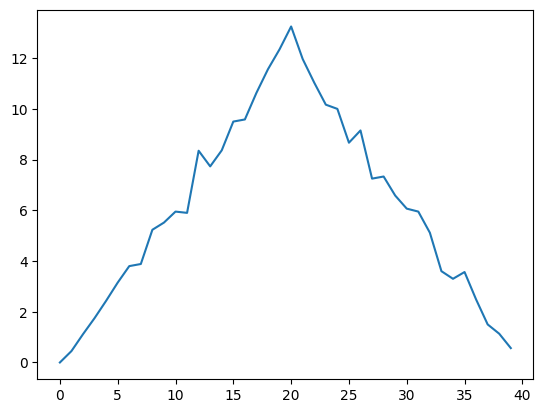

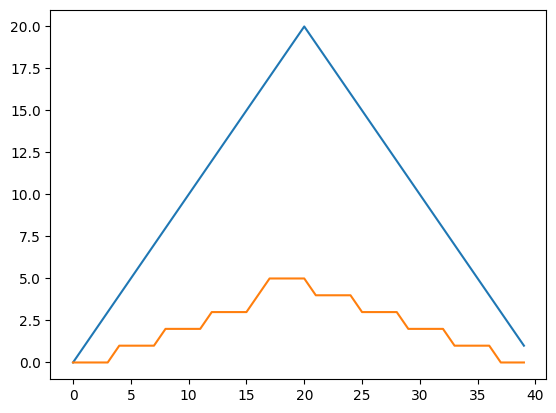

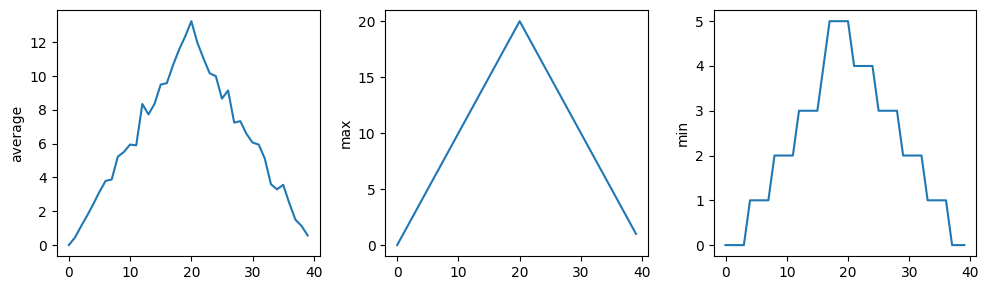

In [72]:
## Import libraries 
import matplotlib.pyplot

## create heat plot using the inflammation data.
## blue = low values
## yellow = high values
# image = matplotlib.pyplot.imshow(data)

## investigate average inflammation over time
avg_inf = numpy.mean(data, axis=0)
avg_plot = matplotlib.pyplot.plot(avg_inf)
matplotlib.pyplot.show() ## display the graph

## plot maximums
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))

## plot minimus:
min_plot = matplotlib.pyplot.plot(numpy.min(data,axis=0))
matplotlib.pyplot.show()

## group plots together
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0)) ## create a space to put all our plots, figsize tells us how big to make it

axes1 = fig.add_subplot(1, 3, 1) ## add each plot to the space. first number = how many rows, second = total number of sublots, third = where to place the plot 
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average') # label axises 
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout() # means we want our plots squeezed together.

matplotlib.pyplot.savefig('inflammation.png')
matplotlib.pyplot.show()

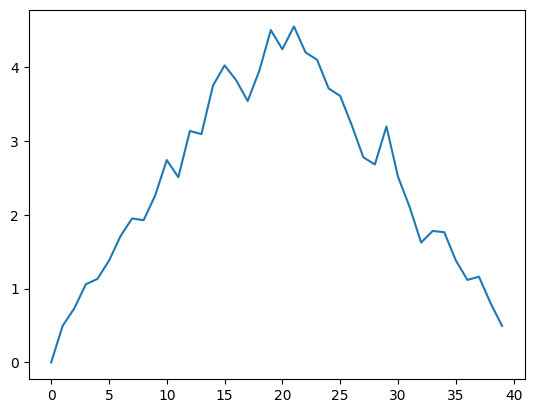

In [74]:
import numpy
import matplotlib
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

std_plot = matplotlib.pyplot.plot(numpy.std(data,axis=0))
matplotlib.pyplot.show()

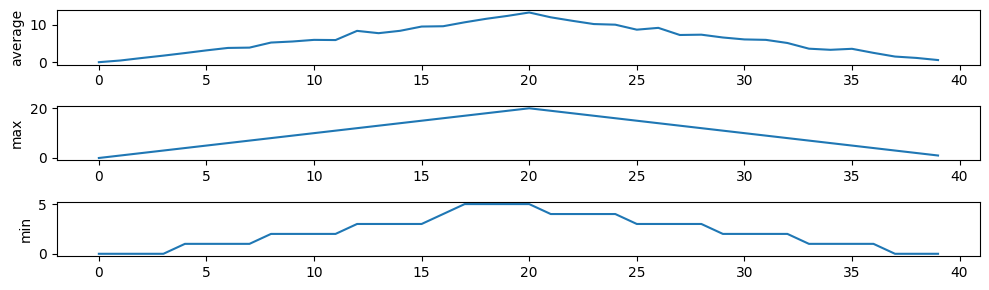

In [76]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(3, 1, 1)
axes2 = fig.add_subplot(3, 1, 2)
axes3 = fig.add_subplot(3, 1, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()

matplotlib.pyplot.savefig('inflammation.png')
matplotlib.pyplot.show()

### Module 5: Storing Multiple Values in Lists
#### Questions:  
- How can I store many values together?

#### Objectives:
- Explain what a list is
- Create and index lists of simple values
- Change the values of individual elements
- Append values to an existing list
- Reorder and slice list elements
- Create and manipulate nested lists

#### Notes:
- A list can store multiple values
- Build into the language [no extra packages are needed]
- Can put things in a list by putting it in square brackets and separating the values with a comma
    - eg. fruit = ["apple","orange","lemon"] or odds = [1, 3, 5, 7]
- Can access list elements using indices (zero indexed)
    - You can use negative numbers. -1 will give the last element, -2 the second to last, etc.
- If you loop over a list, it will give you each item in the list one at a time.
- We can change the items in the list

In [27]:
## storing values in lists
odds = [1, 3, 5, 7]
print('odd numbers are:', odds)

## accessing values in lists
print('the first odd number is:', odds[0])
print('the last odd number is:', odds[3])
print('the -1 odd number is:', odds[-1])

## looping through a list:
for number in odds:
    print(number)
    
    string_for_slicing = 'Observation date: 02-Feb-2013'
list_for_slicing = [['fluorine', 'F'],
                    ['chlorine', 'Cl'],
                    ['bromine', 'Br'],
                    ['iodine', 'I'],
                    ['astatine', 'At']]
print(string_for_slicing[-4:])

print(list_for_slicing[-4:])
counts = [2, 4, 6, 8, 10]
repeats = counts * 2
print(repeats)
beatles = "In an octopus's garden in the shade"
print(len(beatles))
subset = beatles[0:35:2]
print('subset:',subset)

odd numbers are: [1, 3, 5, 7]
the first odd number is: 1
the last odd number is: 7
the -1 odd number is: 7
1
3
5
7
2013
[['chlorine', 'Cl'], ['bromine', 'Br'], ['iodine', 'I'], ['astatine', 'At']]
[2, 4, 6, 8, 10, 2, 4, 6, 8, 10]
35
subset: I notpssgre ntesae
